In [ ]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/TON_IoT/Train_Test_Network.csv")

In [ ]:
train_df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,0,1,63,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,0,0,0,2,354,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [ ]:
train_df.shape

(461043, 45)

In [ ]:
train_df = train_df.drop_duplicates() 

In [ ]:
train_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df['type'].unique()

array(['normal', 'scanning', 'dos', 'injection', 'ddos', 'password',
       'xss', 'ransomware', 'backdoor', 'mitm'], dtype=object)

In [ ]:
train_df = train_df.drop(['src_ip'], axis = 1)

In [ ]:
train_df = train_df.drop(['dst_ip'], axis = 1)

Dropping TimeStamp and dns query (Domain name subject of the query)

In [ ]:
train_df = train_df.drop(['ts','dns_query'], axis = 1)

In [ ]:
train_df= train_df.replace({'http_trans_depth':'-'}, 0)

In [ ]:
train_df= train_df.replace({'weird_addl':'-'}, 0)

In [ ]:
train_df['weird_addl'] = train_df['weird_addl'].astype('int64')

In [ ]:
 train_df['http_trans_depth'] = train_df['http_trans_depth'].astype('int64')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in train_df.columns:
    #print df[c].dtype
    if train_df[c].dtype == "object":
        encodings[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings[c]
        train_df[c] = encodings[c].fit_transform(train_df[c])

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Target variable and train set
y = train_df[['label']]
X = train_df.drop(['label', ], axis = 1)

In [ ]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(301481, 40) (148491, 40)
(301481, 1) (148491, 1)


Code: Python implementation of Guassian Naive Bayes


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time
clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
 

Training time:  0.1983034610748291


In [ ]:
start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.18003511428833008


In [ ]:
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

Train score is: 0.5043004368434495
Test score is: 0.5058892458128775


Code: Python implementation of Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.6916275024414062


In [ ]:
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.04365348815917969


In [ ]:
print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))

Train score is: 1.0
Test score is: 1.0


Code: Python code implementation of Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
  
clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  8.454375505447388


In [ ]:
start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))

Testing time:  0.876335620880127
Train score is: 1.0
Test score is: 1.0


Code: Python implementation of Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
  
clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  3640.3267846107483


In [ ]:
start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:", clfs.score(X_test, y_test))

Testing time:  174.7471489906311
Train score is: 0.9963977829448621
Test score is: 0.9964374945282879


Code: Python implementation of Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
start_time = time.time()
y_test_pred = clfl.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
 

Training time:  18.48239827156067
Testing time:  0.020586252212524414


In [ ]:
print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:", clfl.score(X_test, y_test))
 

Train score is: 0.8796408397212429
Test score is: 0.8786256406112155


Code: Python implementation of Logistic Regression -2

In [ ]:
def getLRClf():
    clf = LogisticRegression(C = 0.2, solver = 'liblinear')
    return clf

Code: Python implementation of Gradient Descent

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
  
clfg = GradientBoostingClassifier(random_state = 0)
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

In [ ]:
start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

Testing time:  0.5846061706542969
Train score is: 1.0
Test score is: 1.0


Code: Analyse the training and testing accuracy of each model.

<BarContainer object of 6 artists>

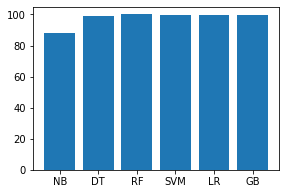

In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.951, 99.058, 99.997, 99.875, 99.352, 99.793]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

<BarContainer object of 6 artists>

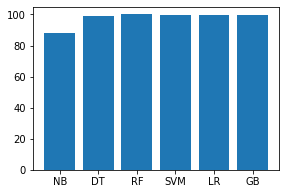

In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.903, 99.052, 99.969, 99.879, 99.352, 99.771]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

Code: Analyse the training and testing time of each model.



In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.11452, 2.44087, 17.08491, 218.26840, 92.94222, 633.229]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
 

In [ ]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.54329, 0.14877, 0.199471, 126.50875, 0.09605, 2.95039]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
 